In [9]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start,end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["AAPL", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-13,97.849998,99.680000,96.910004,99.540001,99.540001,52841500,AMAZON
2023-02-14,98.410004,100.919998,97.519997,99.699997,99.699997,56202900,AMAZON
2023-02-15,99.089996,101.169998,98.449997,101.160004,101.160004,48053900,AMAZON
2023-02-16,99.209999,100.629997,98.099998,98.150002,98.150002,56339200,AMAZON
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,59967700,AMAZON
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400,AMAZON
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100,AMAZON
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000,AMAZON
2023-02-24,93.529999,94.139999,92.320000,93.500000,93.500000,57010100,AMAZON


In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.602431,152.709920,148.646454,150.762111,150.225379,8.416025e+07
std,12.148228,12.070185,12.175696,12.162874,11.984992,2.347794e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973434,6.861430e+07
50%,149.130005,151.270004,147.449997,149.699997,149.399994,7.926520e+07
75%,159.709999,161.669998,156.520004,158.240005,157.511749,9.347200e+07
max,178.550003,179.610001,176.699997,178.960007,177.882446,1.826020e+08


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-02-28 to 2023-02-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


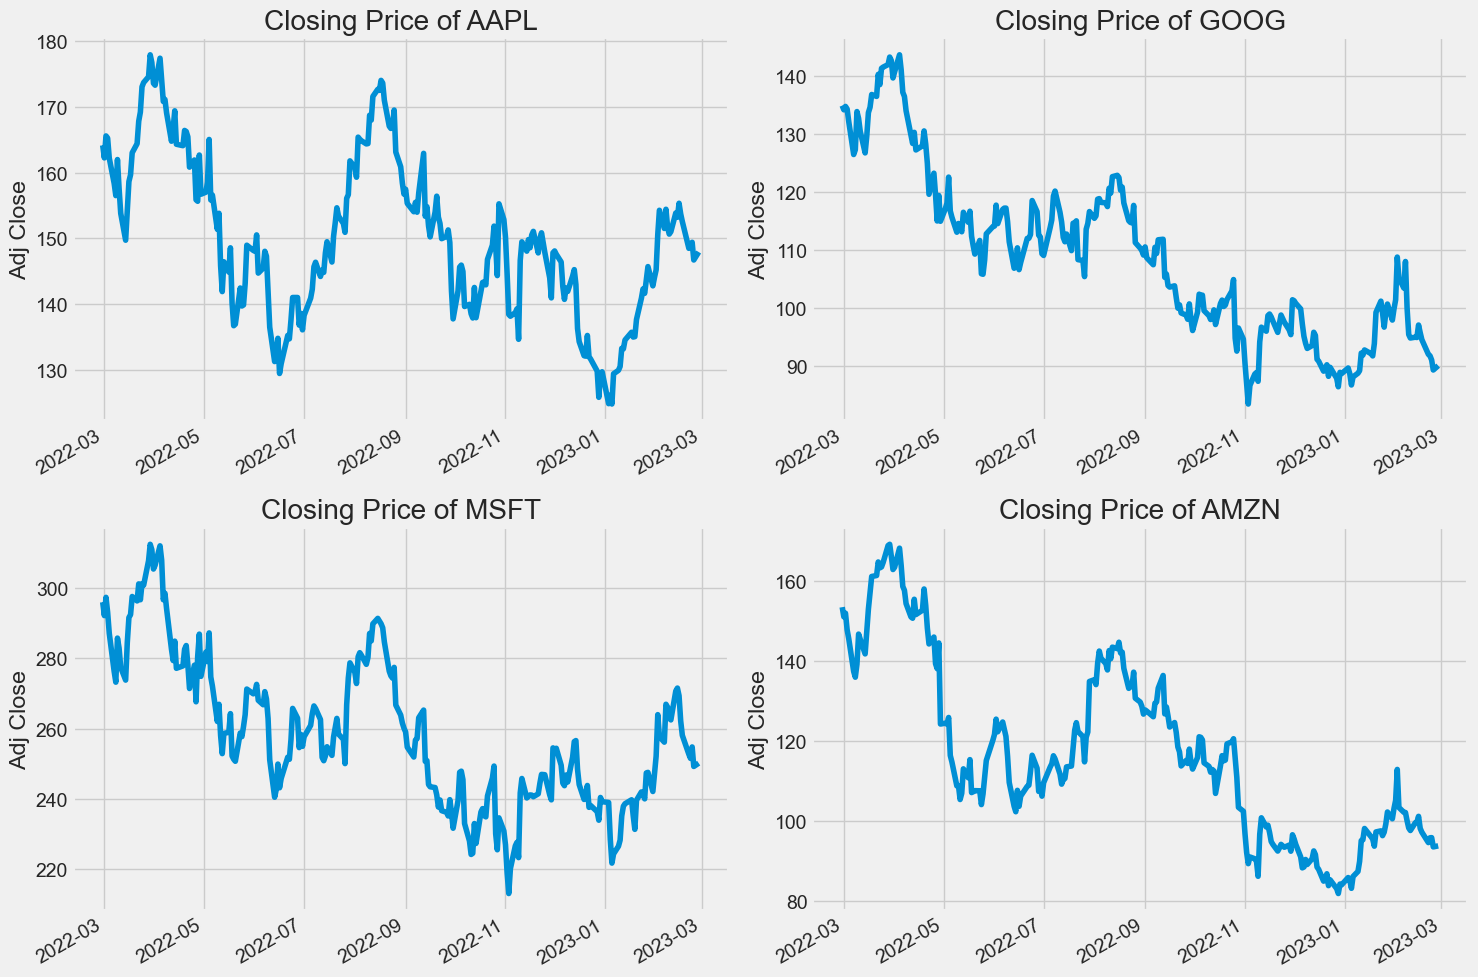

In [12]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i-1]}')

plt.tight_layout()

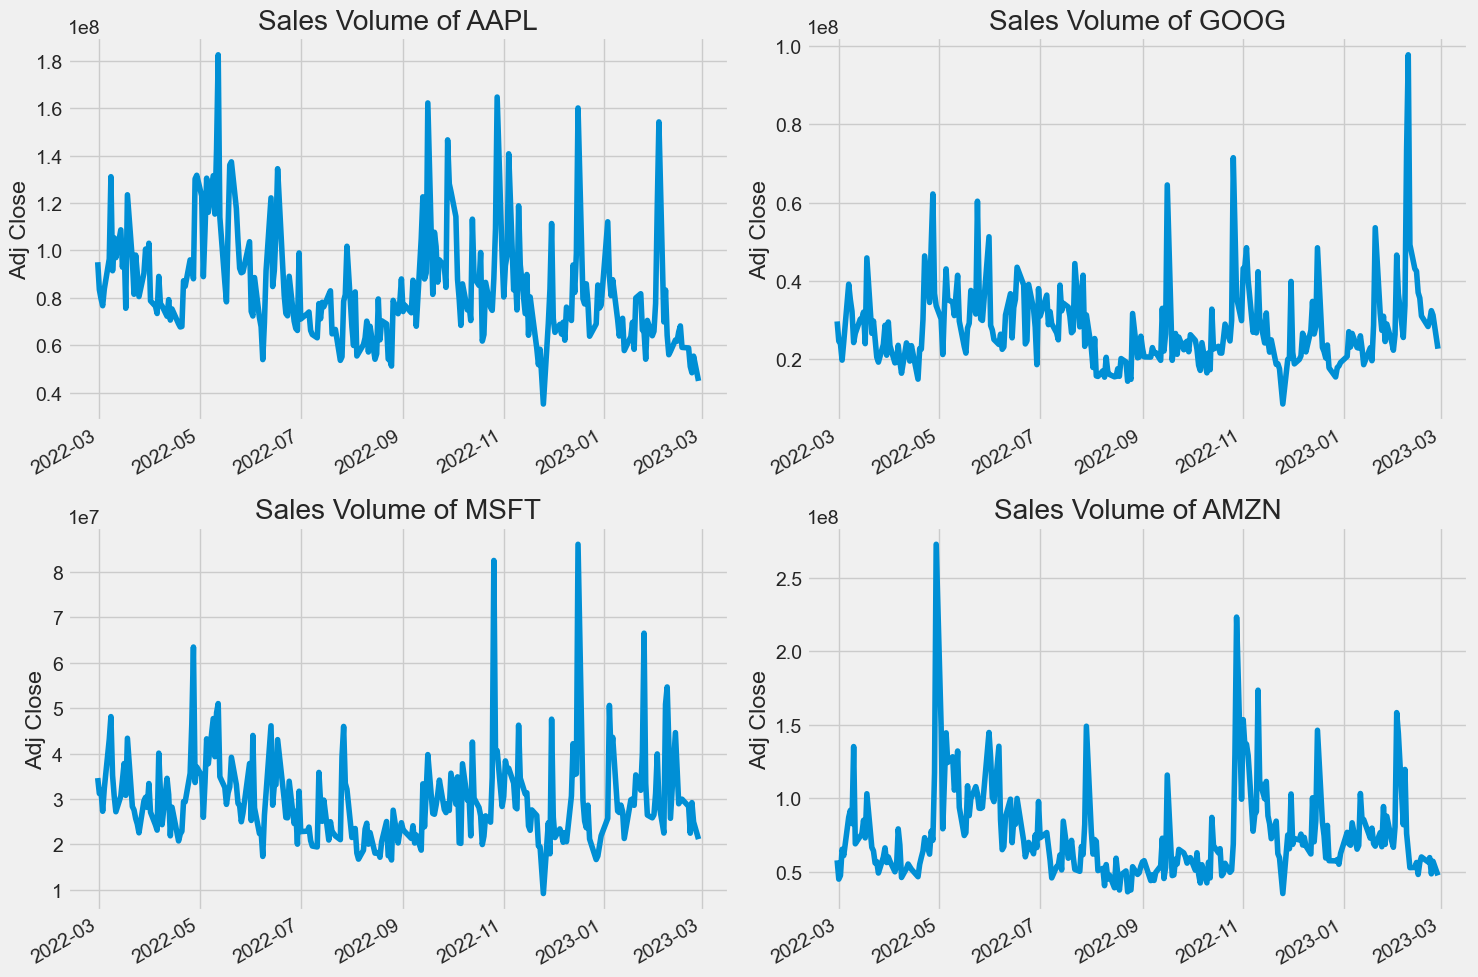

In [13]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Sales Volume of {tech_list[i-1]}')
    
plt.tight_layout()

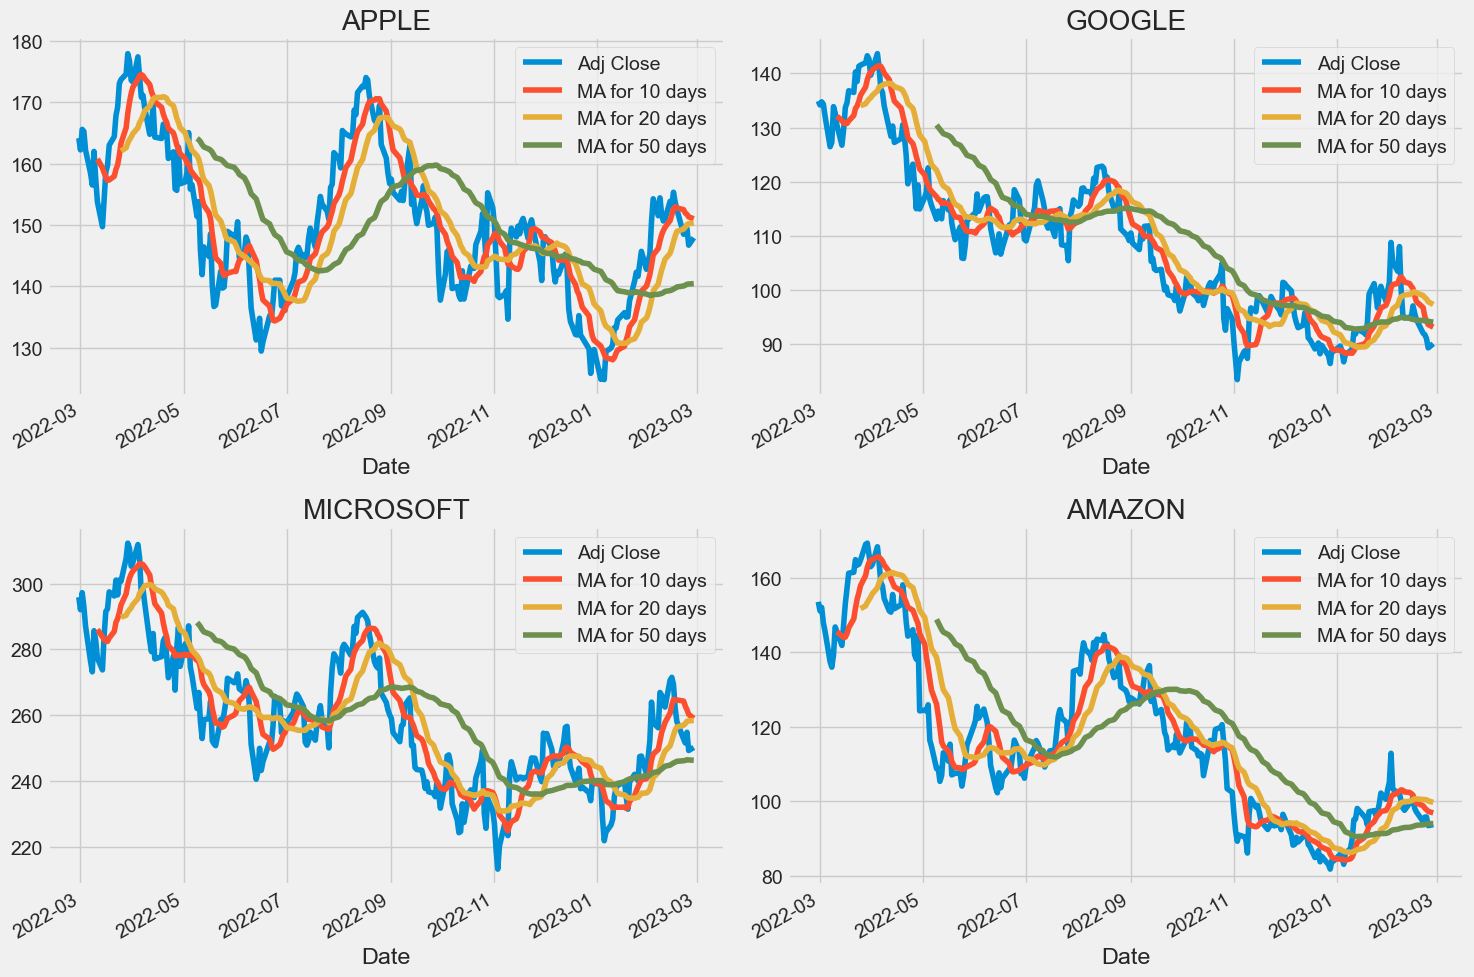

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

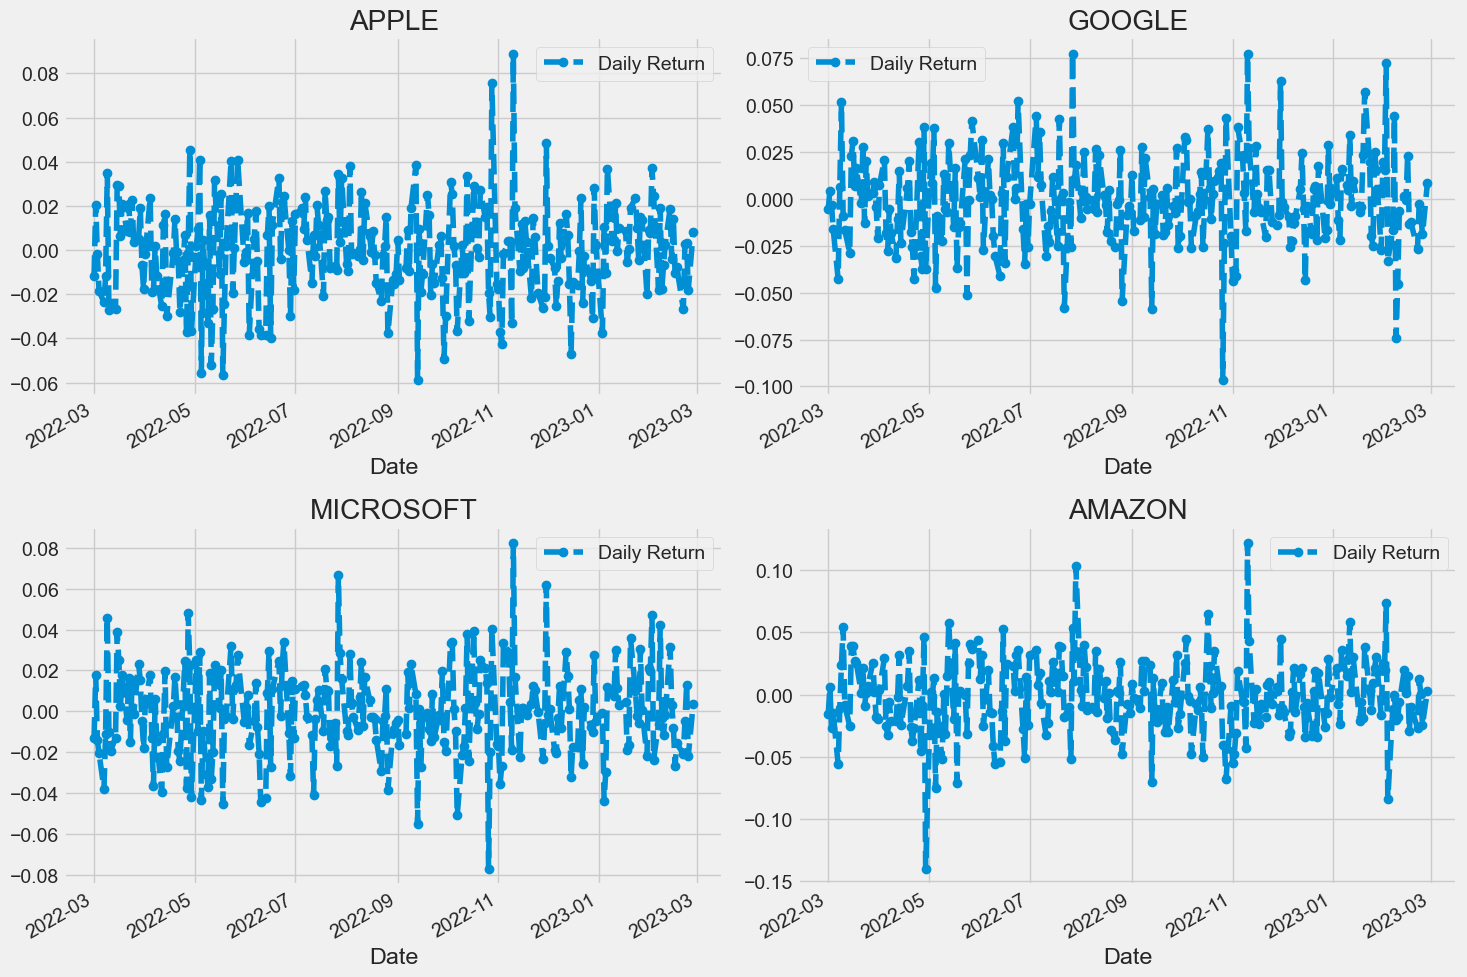

In [15]:
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)


AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

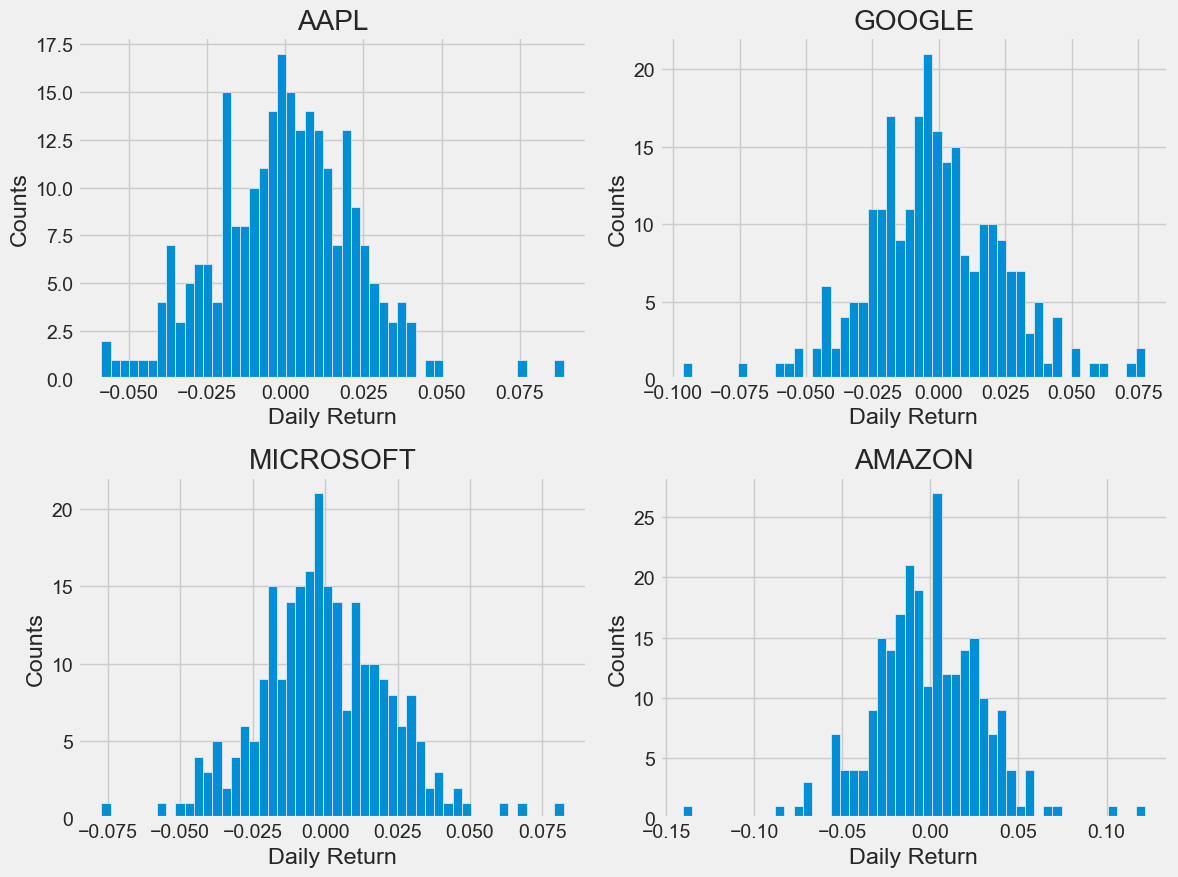

In [16]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

In [21]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-28,NaN,NaN,NaN,NaN
2022-03-01,-0.011628,-0.015766,-0.005360,-0.012852
2022-03-02,0.020588,0.006024,0.004349,0.017766
2022-03-03,-0.001981,-0.027320,-0.003291,-0.014224
2022-03-04,-0.018408,-0.015264,-0.016276,-0.020479


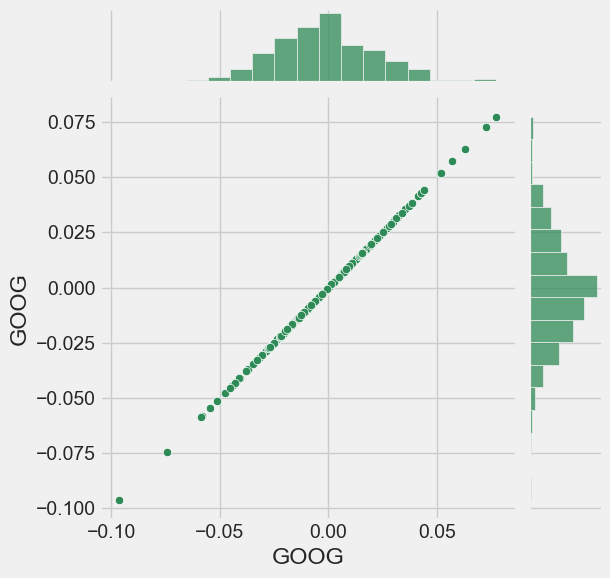

In [22]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

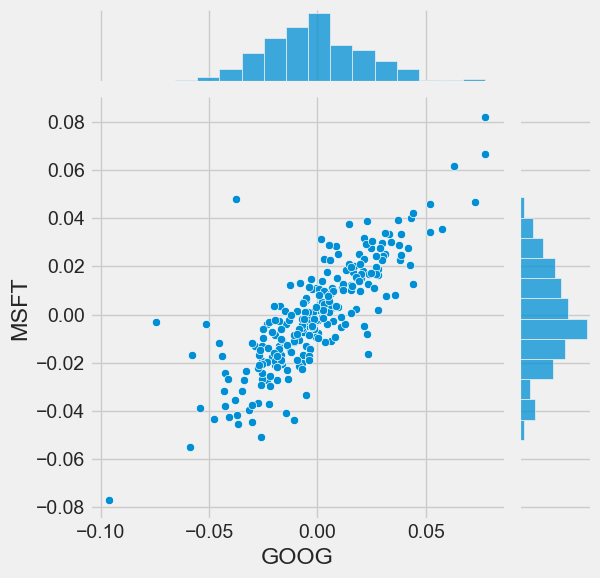

In [23]:
sns.jointplot(x='GOOG',y='MSFT', data=tech_rets, kind='scatter')

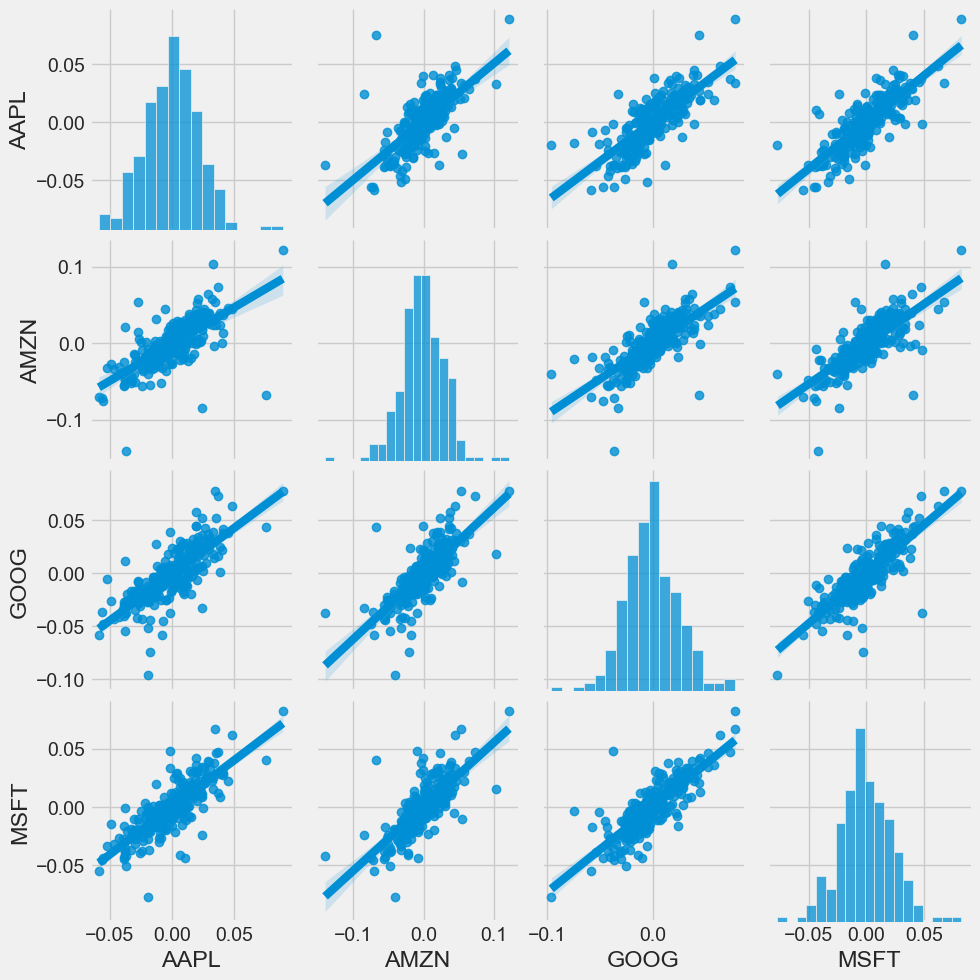

In [24]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

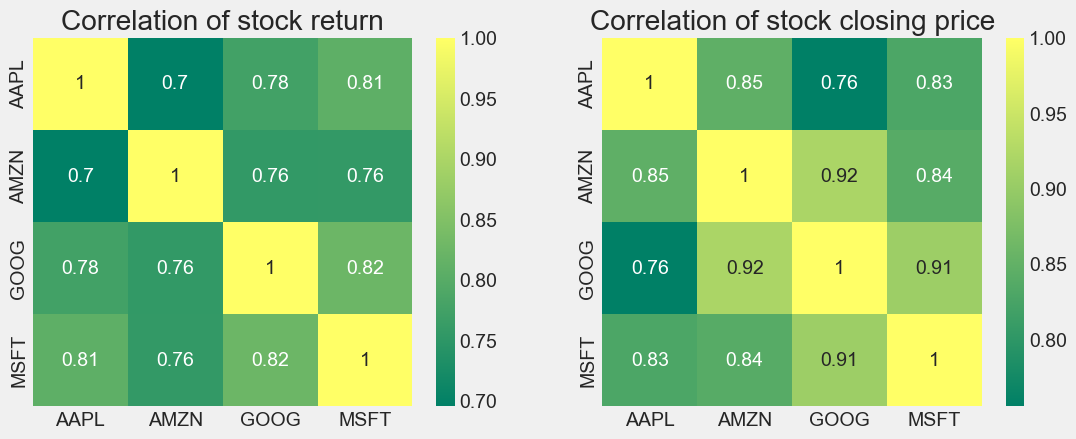

In [25]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

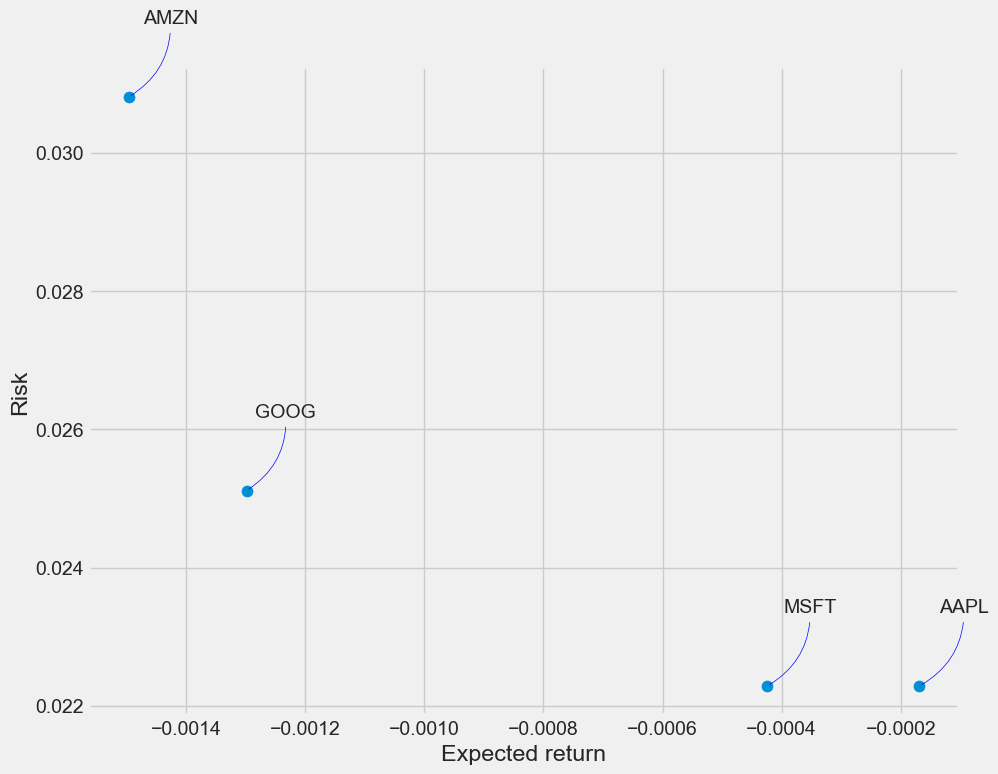

In [26]:
rets = tech_rets.dropna()
area= np.pi * 20

plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50,50), textcoords='offset points', ha='right',va='bottom', arrowprops=dict(arrowstyle='-', color='blue',connectionstyle='arc3, rad=-0.3'))

In [27]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500193,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706892,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839727,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400
...,...,...,...,...,...,...
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200


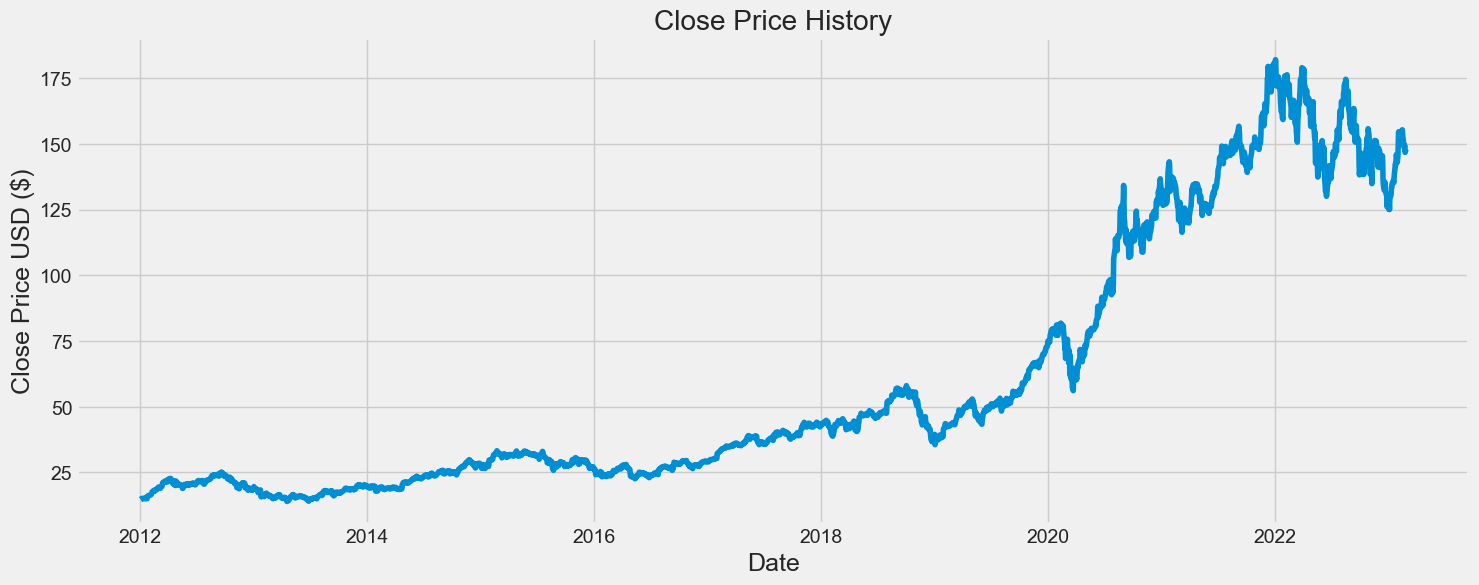

In [28]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [29]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*.95))
training_data_len

2666

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.80596503],
       [0.78995916],
       [0.79715881]])

In [31]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

TypeError: 'tuple' object is not callable

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2606/2606 [==============================] - 50s 14ms/step - loss: 0.0013


In [33]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14.286833583266725

C:\Users\sande\AppData\Local\Temp\ipykernel_13528\2603199341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


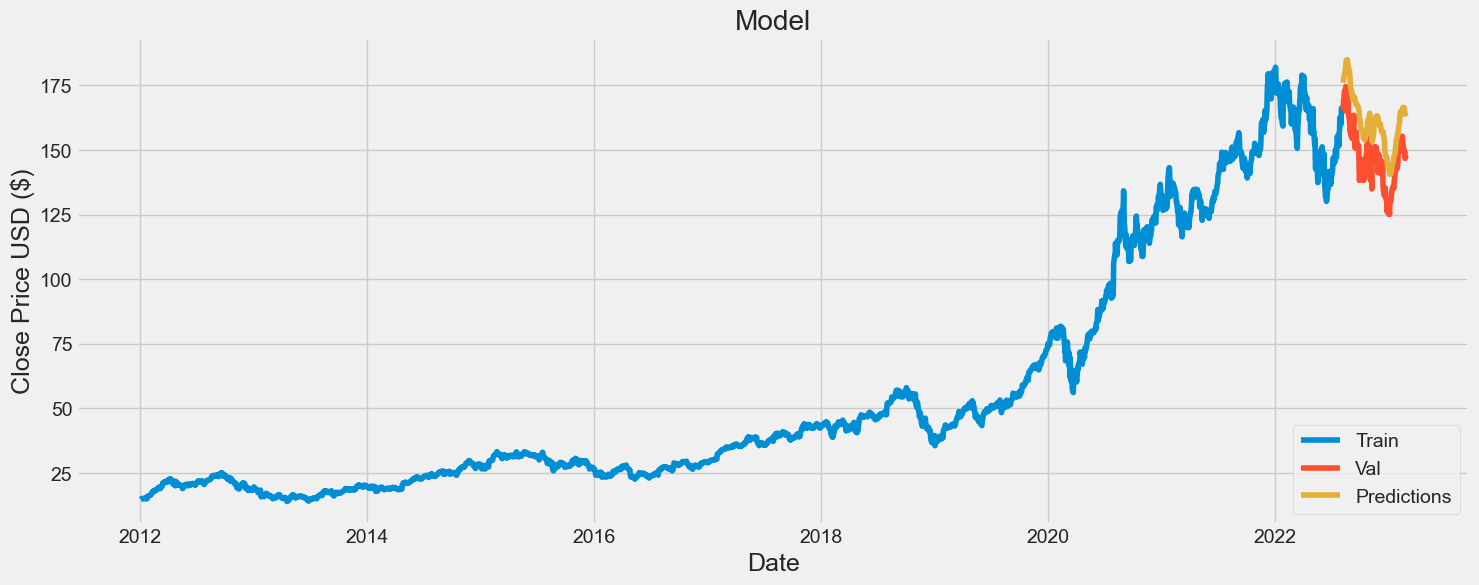

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()